In [ ]:
"""
README :
ce code permet 1) d'établir les modèle OLS
            -->listings_tactics1 (fillna, filtré, organisé...)
         2) de visualiser les tendances des effets des tactiques dans les groupes différents

"""

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
listings=pd.read_csv("../data/listings_tactics1.csv")
print(len(listings))

37014


D:\temp\ipykernel_1340\583481185.py:1: DtypeWarning: Columns (7,23,42,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  listings=pd.read_csv("../data/listings_tactics1.csv")


# prétraitement :

In [ ]:
listings=pd.read_csv("../data/listings_tactics.csv")
print(len(listings))
display(listings.head())

D:\temp\ipykernel_1340\736826429.py:1: DtypeWarning: Columns (7,23,42,46,47,62) have mixed types. Specify dtype option on import or set low_memory=False.
  listings=pd.read_csv("../data/listings_tactics.csv")


74330


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,responsive,fan of Airbnb,Airbnb community,love Airbnb,travel with Airbnb,openness,authenticity,sociability,self_promotion,exemplification
0,0,3109.0,https://www.airbnb.com/rooms/3109,2.023121e+13,2023-12-12,city scrape,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,NaN,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,5396.0,https://www.airbnb.com/rooms/5396,2.023121e+13,2023-12-14,city scrape,Rental unit in Paris · ★4.59 · Studio · 1 bed ...,NaN,"You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,...,0.973056,0.285508,0.749040,0.137775,0.312311,0.565581,-0.008205,0.957697,1.416490,0.373926
2,2,81106.0,https://www.airbnb.com/rooms/81106,2.023121e+13,2023-12-13,city scrape,Rental unit in Paris · ★4.84 · 1 bedroom · 1 b...,NaN,The neighborhood will show you an other side o...,https://a0.muscache.com/pictures/miso/Hosting-...,...,0.639749,0.095681,0.093284,0.021362,0.258570,-0.404478,1.019766,-0.491341,0.606779,-0.441423
3,3,7397.0,https://www.airbnb.com/rooms/7397,2.023121e+13,2023-12-13,city scrape,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/67928287/330b...,...,0.380097,0.000321,0.000877,0.000308,0.001214,-1.157850,-0.733577,-1.889289,-1.456089,-0.778443
4,4,7964.0,https://www.airbnb.com/rooms/7964,2.023121e+13,2023-12-12,city scrape,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,...,0.535471,0.294100,0.898153,0.050386,0.692560,-0.620812,-0.982499,1.353823,1.013025,0.526214


In [ ]:
##------------------booking rate :
listings['booking_rate_l30d'] = listings.apply(
    lambda row: min(row['number_of_reviews_l30d'] / row['availability_30'], 1.0)
    if row['availability_30'] > 0 else None,
    axis=1
)
listings=listings[listings['booking_rate_l30d'].notna()]
print(len(listings[listings['booking_rate_l30d']==0]))
print(len(listings))


##-------------price:dropna
listings["price"] = listings["price"].str.replace(r'[$,]', '', regex=True)
listings["price"] = pd.to_numeric(listings["price"], errors="coerce")
print(listings.price.describe(include='all')) #mean:232.954125
listings=listings[listings["price"].notna()]
print(len(listings))


# -----------review_scores_rating :
listings["review_scores_rating"] = pd.to_numeric(listings["review_scores_rating"], errors="coerce")
print(listings.review_scores_rating.notna().value_counts()/len(listings))#19%nan，remplit par la moyenne 4.68
print('review :',listings.review_scores_rating.describe(include='all'),'\n')
listings['review_scores_rating']=listings['review_scores_rating'].fillna(4.68)

##------------instant bookable
listings['instant_bookable']=listings['instant_bookable'].fillna('f')
print(listings.instant_bookable.isna().value_counts())


26516
37587
count    37014.000000
mean       232.952153
std        671.684600
min         10.000000
25%         98.000000
50%        141.000000
75%        225.000000
max      84420.000000
Name: price, dtype: float64
37014
review_scores_rating
True     0.80194
False    0.19806
Name: count, dtype: float64
review : count    29683.000000
mean         4.689288
std          0.428460
min          0.000000
25%          4.570000
50%          4.810000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64 

instant_bookable
False    37014
Name: count, dtype: int64


In [ ]:
#-----------------host_is_superhost
listings['host_is_superhost']=listings['host_is_superhost'].apply(lambda x: 'f' if x!='t' and x!='f' else x)
print(listings.host_is_superhost.value_counts())

#-------------- host_identity_verified
print(listings.host_identity_verified.value_counts())
listings['host_identity_verified']=listings['host_identity_verified'].apply(lambda x: 'f' if x!='t' and x!='f' else x)


#----------------host_has_profile_pic
listings['host_has_profile_pic']=listings['host_has_profile_pic'].apply(lambda x: 'f' if x!='t' and x!='f' else x)
print(listings.host_has_profile_pic.value_counts())


#-------------professional_host : listing>1
listings['professional_host'] = listings['calculated_host_listings_count'].apply(
    lambda x: 't' if pd.notna(x) and x > 1 else 'f'
)
print(listings.professional_host.value_counts())

#------------yrs_experience:
from datetime import datetime

listings['host_since'] = pd.to_datetime(listings['host_since'], errors='coerce')
last_scraped = pd.to_datetime("2023-12-13")#*

listings['yrs_experience'] = (last_scraped - listings['host_since']).dt.days / 365.25
listings['yrs_experience'] = listings['yrs_experience'].fillna(0).astype(int)

##------------langue:
listings['langue']=listings['langue'].fillna('unk')
print(listings.langue.value_counts())

host_is_superhost
f    29281
t     7733
Name: count, dtype: int64
host_identity_verified
t          35321
f           1690
$119.00        1
Name: count, dtype: int64
host_has_profile_pic
t    35850
f     1164
Name: count, dtype: int64
professional_host
f    21353
t    15661
Name: count, dtype: int64
langue
unk           20389
fr             9216
en             6864
other_lang      545
Name: count, dtype: int64


In [ ]:
## location ctg
listings.host_location.value_counts()
def categorize_location(loc):
    if pd.isna(loc) or loc.strip() == "":
        return "other_country"
    loc = loc.lower()
    if "france" in loc:
        return "France"
    elif "united kingdom" in loc or "london" in loc or "gb" in loc:
        return "GB"
    else:
        return "other_country"

listings["host_location_category"] = listings["host_location"].apply(categorize_location)
listings.host_location_category.value_counts()


host_location_category
France           26906
other_country     9641
GB                 467
Name: count, dtype: int64

In [ ]:
##property type
def categorize_property(ptype):
    if pd.isna(ptype) or str(ptype).strip() == "":
        return "others"
    ptype_lower = str(ptype).lower()

    # ENTIRE
    if any(word in ptype_lower for word in ["entire", "condo", "loft", "apartment"]):
        return "entire"

    # HOTEL
    elif "hotel" in ptype_lower:
        return "hotel"

    # SHARED
    elif any(word in ptype_lower for word in ["shared", "bed and breakfast", "boutique"]):
        return "shared"

    # PRIVATE
    elif "private" in ptype_lower:
        return "private"

    else:
        return "others"

listings["property_type_category"] = listings["property_type"].apply(categorize_property)
print(listings.property_type_category.value_counts())


property_type_category
entire     32557
private     2314
hotel       1567
shared       544
others        32
Name: count, dtype: int64


In [ ]:
listings['len']=listings['host_about'].apply(lambda x : len(str(x).split()) if isinstance(x, str) else 0)
listings['len_squared']=listings['len']*listings['len']
print(listings.len.isna().value_counts())


len
False    37014
Name: count, dtype: int64


In [ ]:
#check notna:
cols = ["booking_rate_l30d","langue","host_is_superhost","professional_host",
        "yrs_experience","host_identity_verified","host_has_profile_pic",
        "availability_30","price","review_scores_rating",
        "host_location_category","property_type_category",
        "instant_bookable","len","len_squared"]
print(len(listings))
print(listings[cols].isna().sum())


37014
booking_rate_l30d         0
langue                    0
host_is_superhost         0
professional_host         0
yrs_experience            0
host_identity_verified    0
host_has_profile_pic      0
availability_30           0
price                     0
review_scores_rating      0
host_location_category    0
property_type_category    0
instant_bookable          0
len                       0
len_squared               0
dtype: int64


In [ ]:
#sauvegarder:
# listings.to_csv('../data/listings_tactics1.csv',index=False)

In [ ]:
##VIF: vérifier la corélation entre les variables:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


formula=('booking_rate_l30d ~ C(langue) + C(host_is_superhost) + C(professional_host) +'
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic) +'
' availability_30 + price + review_scores_rating + '
'C(host_location_category) + C(property_type_category) + C(instant_bookable) + '
'len + openness +authenticity + sociability + self_promotion + exemplification ')

y, X = dmatrices(formula, data=listings, return_type='dataframe')
vif_df = pd.DataFrame()
vif_df['Variables']=X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_df)



,Variables,VIF
0,Intercept,248.083986
1,C(langue)[T.fr],2.309710
2,C(langue)[T.other_lang],1.100159
3,C(langue)[T.unk],2.627890
4,C(host_is_superhost)[T.t],1.094872
5,C(professional_host)[T.t],1.356954
6,C(host_identity_verified)[T.t],1.021732
7,C(host_has_profile_pic)[T.t],1.086962
8,C(host_location_category)[T.GB],1.198039
9,C(host_location_category)[T.other_country],1.412231


# OLS:

In [ ]:
## model basic:
model1=smf.ols('booking_rate_l30d ~ C(langue) + C(host_is_superhost) + C(professional_host) +'
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic) +'#host_response_rate+
' availability_30 + price + review_scores_rating + '
'C(host_location_category) + C(property_type_category)+ C(instant_bookable) + '#+ beds +bathrooms+
'len + len_squared', data=listings).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      booking_rate_l30d   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     320.2
Date:                Sat, 30 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:15:10   Log-Likelihood:                 8627.1
No. Observations:               37014   AIC:                        -1.721e+04
Df Residuals:                   36993   BIC:                        -1.703e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
#ajouter les tactiques:
model2=smf.ols('booking_rate_l30d ~ C(langue) + C(host_is_superhost) + C(professional_host) +'
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic)+'
' availability_30 + price + review_scores_rating + '
'C(host_location_category) + C(property_type_category) + C(instant_bookable) + '
'len + len_squared + openness + authenticity + sociability +self_promotion + exemplification', data=listings).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      booking_rate_l30d   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     258.0
Date:                Sat, 30 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:15:15   Log-Likelihood:                 8646.8
No. Observations:               37014   AIC:                        -1.724e+04
Df Residuals:                   36988   BIC:                        -1.702e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
#ajouter host_is_superhost comme item d'interaction:
model3=smf.ols('booking_rate_l30d ~ C(langue) + C(professional_host) +'
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic)+'
' availability_30 + price + review_scores_rating + '
'C(host_location_category) + C(property_type_category) + C(instant_bookable) + '
'len + len_squared +'
'C(host_is_superhost)*(openness + authenticity + sociability +self_promotion + exemplification)', data=listings).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:      booking_rate_l30d   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     216.2
Date:                Sat, 30 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:15:19   Log-Likelihood:                 8662.7
No. Observations:               37014   AIC:                        -1.726e+04
Df Residuals:                   36983   BIC:                        -1.700e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
## taille d'effet : cohen's d :
# calculer la différence effective entre les groupes : petite:0.2, médium：0.5, grande ：0.8

import numpy as np
from scipy import stats

def t_test(x,y,tactic):
    t_stat, p_val = stats.ttest_ind(x[tactic], y[tactic],equal_var=False, nan_policy='omit')#ignorer les nan
    return t_stat, p_val

def cohens_d(x, y,tactic):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1) * np.std(x[tactic], ddof=1) ** 2 + (ny - 1) * np.std(y[tactic], ddof=1) ** 2) / (nx + ny - 2))
    return (np.mean(x[tactic]) - np.mean(y[tactic])) / pooled_std


##GROUPED data:
data = listings[listings['host_is_superhost'] == 't']#*
data_ =listings[listings['host_is_superhost'] == 'f']#*

cols_tactics=['openness', 'authenticity','sociability', 'self_promotion', 'exemplification']
results = []
for tactic in cols_tactics :
    t_stat, p_val = t_test(data, data_, tactic)
    d = cohens_d(data, data_, tactic)
    mean1 = data[tactic].mean()
    mean2 = data_[tactic].mean()

    results.append({
        'Tactique': tactic,
        'Superhost (Mean)': mean1,
        'Non-Superhost (Mean)': mean2,
        "Cohen's d": round(d, 2),
        't': round(t_stat, 2),
        'p': round(p_val, 4),

    })

df_results = pd.DataFrame(results)
display(df_results)

,Tactique,Superhost (Mean),Non-Superhost (Mean),Cohen's d,t,p
0,openness,0.029246,-0.036926,0.11,7.86,0.0000
1,authenticity,0.050750,-0.070596,0.20,14.89,0.0000
2,sociability,0.069881,-0.036348,0.17,12.51,0.0000
3,self_promotion,-0.006171,0.056273,-0.10,-7.55,0.0000
4,exemplification,-0.021155,0.002510,-0.04,-3.01,0.0026


# visualisation:

In [ ]:
def interaction_plot_advanced(tactic='openness', listings=listings, mediator='host_is_superhost', ax=None, show=True):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    import re

    # mapping 0/1
    listings = listings.copy()
    listings[mediator] = listings[mediator].map({'f': 0, 't': 1})

    formula = ('booking_rate_l30d ~ C(langue) + C(professional_host) + '
               'yrs_experience + C(host_identity_verified) + C(host_has_profile_pic)  + '
               'availability_30 + price + review_scores_rating + '
               'C(host_location_category) + C(property_type_category) + C(instant_bookable) + '
               'C(host_is_superhost)*(openness + authenticity + sociability + self_promotion + exemplification)')

    model = smf.ols(formula, data=listings).fit(cov_type="HC3")

    tactic_range = np.linspace(listings[tactic].min(), listings[tactic].max(), 100)
    groups = [0, 1]  # non superhost / superhost

    default_vals = {}
    for col in model.model.exog_names:
        if ':' in col or col == 'Intercept':
            continue
        var_name = col.split('[')[0].replace('C(', '').replace(')', '')
        if var_name in listings.columns:
            if listings[var_name].dtype == 'O' or listings[var_name].nunique() < 10:
                default_vals[var_name] = listings[var_name].mode()[0]
            else:
                default_vals[var_name] = listings[var_name].mean()

    vars_in_formula = re.findall(r'[a-zA-Z_][a-zA-Z0-9_]*', formula)
    default_vals = {k: v for k, v in default_vals.items() if k in vars_in_formula}

    rows = []
    for g in groups:
        for val in tactic_range:
            row = default_vals.copy()
            row[tactic] = val
            row[mediator] = g
            rows.append(row)

    predict_df = pd.DataFrame(rows)

    for col in predict_df.columns:
        if col in listings.columns and listings[col].dtype == 'O':
            predict_df[col] = predict_df[col].astype(listings[col].dtype)

    predict_df['predicted_booking_rate'] = model.predict(predict_df)

    preds = model.get_prediction(predict_df)
    pred_summary = preds.summary_frame(alpha=0.05)
    predict_df['ci_lower'] = pred_summary['mean_ci_lower']
    predict_df['ci_upper'] = pred_summary['mean_ci_upper']

    # --- visualisation ---
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
    else:
        fig = ax.figure

    for g in groups:
        group_df = predict_df[predict_df[mediator] == g]
        label = f'Superhost' if g == 1 else f'Non-superhost'
        ax.plot(group_df[tactic], group_df['predicted_booking_rate'], label=label)
        ax.fill_between(group_df[tactic], group_df['ci_lower'], group_df['ci_upper'], alpha=0.2)

    # ax.set_xlabel(f'{tactic}')
    ax.set_ylabel('Taux de réservation prédit')
    # ax.set_title(f"{tactic} × {mediator}")
    ax.set_title(f"{tactic} × Superhost")

    ax.legend()

    if show and ax is None:
        plt.show()

    return fig, ax


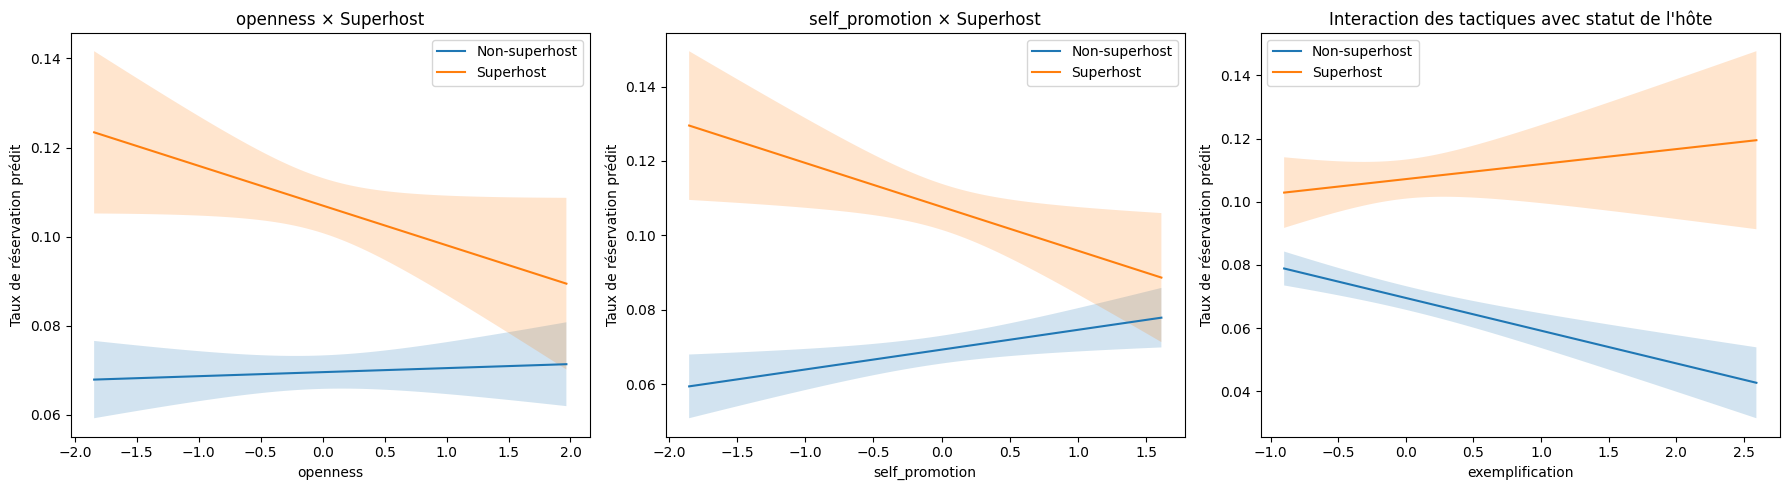

In [ ]:

tactics = ['openness', 'self_promotion', 'exemplification']
fig, axes = plt.subplots(1, len(tactics), figsize=(6*len(tactics), 5), sharey=False)#partager la meme echelle

for tactic, ax in zip(tactics, axes):
    interaction_plot_advanced(tactic, listings, 'host_is_superhost', ax=ax, show=False)

plt.title("Interaction des tactiques avec statut de l'hôte")
plt.tight_layout()
plt.savefig('../figs/interaction_plot.jpg', dpi=300)
plt.show()